In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from latdft import LatticeDFT

In [2]:
dft = LatticeDFT()

============== The DFT 3D for Lattice fluids ==============


In [3]:
dft.Set_Geometry(np.array([6,6,56]),gridsize=1.0)
dft.N[0]

Geometry properties:
Lx = 6  A
Ly = 6  A
Lz = 56  A
Vol = 2016  A³
The gridsize is 1.0


6

In [4]:
dft.Set_FluidProperties(epsilon=1.0)
dft.Set_Temperature(kT=1.0)

Fluid properties:
epsilon/kB = 1.0  K
Temperature = 1.0  K


In [5]:
epsilons = -3.0
phi = np.zeros_like(dft.rho)

In [6]:
# repulsive wall
phi[0,:,dft.N[0]:-dft.N[0]] = 1.0
phi[-1,:,dft.N[0]:-dft.N[0]] = 1.0
phi[:,0,dft.N[0]:-dft.N[0]] = 1.0
phi[:,-1,dft.N[0]:-dft.N[0]] = 1.0

#attractive wall
phi[1,1:-1,dft.N[0]:-dft.N[0]] = epsilons
phi[-2,1:-1,dft.N[0]:-dft.N[0]] = epsilons
phi[1:-1,1,dft.N[0]:-dft.N[0]] = epsilons
phi[1:-1,-2,dft.N[0]:-dft.N[0]] = epsilons

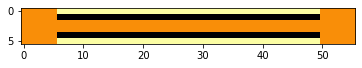

In [7]:
plt.imshow(phi[:,dft.N[0]//2,:],cmap='inferno')

In [8]:
dft.Set_External_Potential(phi)

In [9]:
rhobarray = np.arange(0.01,0.9,0.01)
muarray = np.empty_like(rhobarray)
Parray = np.empty_like(rhobarray)

for i in range(rhobarray.size):

    dft.Set_BulkDensity(rhobarray[i])
    muarray[i] = dft.mu
    Parray[i] = dft.P

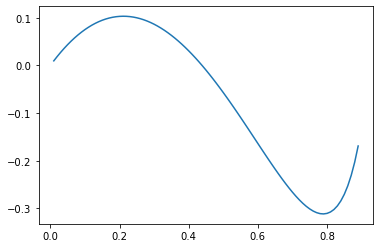

In [10]:
plt.plot(rhobarray,Parray)

# Adsorption

In [11]:
rhobarray = np.arange(0.001,0.071,0.001)
Parray = np.empty_like(rhobarray)
Nadsarray = np.empty_like(rhobarray)

dft.Set_BulkDensity(rhobarray[0])
dft.Set_InitialCondition()

dft.Calculate_Equilibrium(alpha0=0.21,dt=0.005,rtol=1e-3,atol=1e-5,logoutput=False)

Nadsarray[0] = dft.Nads

Nx, Ny, Nz = dft.rho.shape
rhomap = np.empty((rhobarray.size,Nx, Ny, Nz))

rhomap[0] = dft.rho

for i in range(1,rhobarray.size):
    dft.Set_BulkDensity(rhobarray[i])
    Parray[i] = dft.P

    dft.Calculate_Equilibrium(alpha0=0.21,dt=0.005,rtol=1e-3,atol=1e-5,logoutput=False)
    
    rhomap[i] = dft.rho
    Nadsarray[i] = dft.Nads

In [12]:
rhobarray.size

70

In [13]:
Parray[21]/Parray[-1]

0.3593115604588537

In [14]:
rhomap[1].max()

0.045656032476190316

In [15]:
rhomap[41].max()

0.9885520528228229

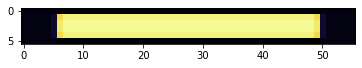

In [16]:
plt.imshow(rhomap[30,4,:,:],cmap='inferno',vmin=0.,vmax=1.0)

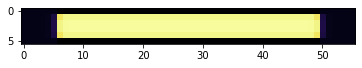

In [17]:
plt.imshow(rhomap[41,4,:,:],cmap='inferno',vmin=0.,vmax=1.0)

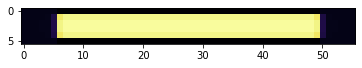

In [18]:
plt.imshow(rhomap[42,4,:,:],cmap='inferno',vmin=0.,vmax=1.0)

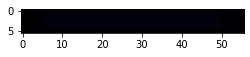

In [19]:
%matplotlib inline
from matplotlib import animation
from matplotlib.animation import PillowWriter

def animate(i):
    ax.clear()
    ax.imshow(rhomap[i,4,:,:],cmap='inferno',vmin=0.,vmax=1.0)
    return fig,
    
fig, ax = plt.subplots(1,1,figsize=(4,3))
ani = animation.FuncAnimation(fig, animate, frames= rhobarray.size,
                               interval = 50)
ani.save('rhomap.gif',writer='pillow',fps=30,dpi=200)

Text(0, 0.5, '$N_{ads}$')

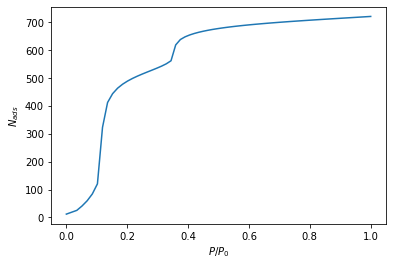

In [20]:
plt.plot(Parray/Parray[-1],Nadsarray)
plt.xlabel('$P/P_0$')
plt.ylabel('$N_{ads}$')

# Desorption

In [21]:
Nadsarraydes = np.empty_like(rhobarray)

for i in range(rhobarray.size):
    dft.Set_BulkDensity(rhobarray[rhobarray.size-1-i])

    dft.Calculate_Equilibrium(alpha0=0.2,dt=0.005,rtol=1e-3,atol=1e-5,logoutput=False)
    
    Nadsarraydes[rhobarray.size-1-i] = dft.Nads

Text(0, 0.5, '$N_{ads}$')

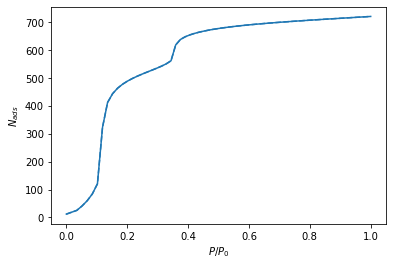

In [22]:
plt.plot(Parray/Parray[-1],Nadsarray)
plt.plot(Parray/Parray[-1],Nadsarraydes,'C0--')
plt.xlabel('$P/P_0$')
plt.ylabel('$N_{ads}$')

In [24]:
np.save('isotherm-prism-L='+str(dft.N[0])+'x'+str(dft.N[1])+'x'+str(dft.N[2])+'-epsilonsf='+str(-epsilons)+'.npy',[Parray/Parray[-1],Nadsarray,Nadsarraydes])

In [25]:
Parray1p5,Nadsarray1p5,Nadsarraydes1p5 = np.load('isotherm-prism-L=6x6x4-epsilonsf=1.5.npy')
Parray3,Nadsarray3,Nadsarraydes3 = np.load('isotherm-prism-L=6x6x4-epsilonsf=3.npy')

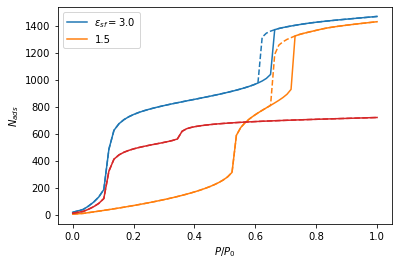

In [27]:
plt.plot(Parray3,Nadsarray3,'C0',label='$\epsilon_{sf}=3.0$')
plt.plot(Parray3,Nadsarraydes3,'C0--')

plt.plot(Parray1p5,Nadsarray1p5,'C1',label='1.5')
plt.plot(Parray1p5,Nadsarraydes1p5,'C1--')

plt.plot(Parray/Parray[-1],Nadsarray,'C3')
plt.plot(Parray/Parray[-1],Nadsarraydes,'C3--')

plt.xlabel('$P/P_0$')
plt.ylabel('$N_{ads}$')
plt.legend(loc='upper left')